##About The Dataset

* I have Used Steel Faults Dataset, in which Pastry is the Target Variable.
* I need to predict whether the given metal sheet or metal plate is faulty or not.



#**Table of Contents**


1. Import The Libraries
2. Columns Description
3. Loading The Dataset
4. Exploratory Data Analysis
      - isnull().sum()
      - columns
      - value_counts
      - Box plot for checking null values
      -  Handling Outliers
      -  Kde plot
      -  dist plot
      -  Bar plot of mean of type of steel A300 and Pastry
      -  Bar plot of mean of Steel plate thickness and Pastry
      -  Violin Plot
        Correlation Matrix
5. Declare Feature Vector and Target Variable
6. Feature Engineering
7. SMOTE Technique
8. Split The Dataset into Training and Testing set
9. Model Training
10. Training and Testing Scores
11. Check Accuracy Score
12. Underfitting and Overfitting
13. Accuracy Score after Overfitting
14. Compare Null Accuracy with Model Accuracy
15. Confusion Matrix
16. ROC-AOC
17. ROC-AOC after Overfitting
18. Classification Metrics
19. Predict Results
20. Predict Proba Method
21. Various Algorithms
22. Feature Scores
23. K-Fold Cross Validation Score
24. Hyperparameter Optimization using GridSearchCV
25. Results and Conclusions




#**1. Import The Libraries**

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

#**2. Columns Description**
1. **X_Minimum:** Minimum x-coordinate of a bounding box or region of interest in an image.
2. **X_Maximum:** Maximum x-coordinate of a bounding box or region of interest in an image.
3. **Y_Minimum:** Minimum y-coordinate of a bounding box or region of interest in an image.
4. **Y_Maximum:** Maximum y-coordinate of a bounding box or region of interest in an image.
5. **Pixels_Areas:** Area in pixels of the region of interest in an image.
6. **X_Perimeter:** Perimeter (length of the boundary) in the x-direction of the region of interest.
7. **Y_Perimeter:** Perimeter (length of the boundary) in the y-direction of the region of interest.
8. **Sum_of_Luminosity:** Sum of the luminosity (brightness) values of pixels in the region of interest.
9. **Minimum_of_Luminosity:** Minimum luminosity value in the region of interest.
10. **Maximum_of_Luminosity:** Maximum luminosity value in the region of interest.
11. **Length_of_Conveyer:** Length of the conveyer belt or system in a manufacturing or processing environment.
12. **TypeOfSteel_A300:** Categorical variable indicating the type of steel (A300 or not).
13. **TypeOfSteel_A400:** Categorical variable indicating the type of steel (A400 or not).
14. **Steel_Plate_Thickness:** Thickness of the steel plate in the manufacturing process.
15. **Edges_Index:** Index representing the ratio of the total perimeter to the perimeter of the bounding box.
16. **Empty_Index:** Index representing the ratio of the area of empty spaces to the area of the bounding box.
17. **Square_Index:** Index representing the ratio of the area of the bounding box to the area of the region of interest.
18. **Outside_X_Index:** Index representing the ratio of the count of pixels on the outer side of the bounding box in the x-direction to the total count of pixels.
19. **Edges_X_Index:** Index representing the ratio of the count of pixels on the edges in the x-direction to the total count of pixels.
20. **Edges_Y_Index:** Index representing the ratio of the count of pixels on the edges in the y-direction to the total count of pixels.
21. **Outside_Global_Index:** Index representing the ratio of the count of pixels on the outer side of the bounding box to the total count of pixels.
22. **LogOfAreas:** Logarithm of the area of the region of interest.
23. **Log_X_Index:** Logarithm of the ratio of the area of the bounding box to the total area in the x-direction.
24. **Log_Y_Index:** Logarithm of the ratio of the area of the bounding box to the total area in the y-direction.
25. **Orientation_Index:** Index representing the orientation of the region of interest.
26. **Luminosity_Index:** Index representing the luminosity characteristics of the region of interest.
27. **SigmoidOfAreas:** Sigmoid function applied to the area of the region of interest.
28. **Pastry:** Target variable indicating the presence of a specific fault type (Pastry or not).
29. **Z_Scratch:** Target variable indicating the presence of a specific fault type (Z_Scratch or not).
30. **K_Scratch:** Target variable indicating the presence of a specific fault type (K_Scratch or not).
31. **Stains:** Target variable indicating the presence of a specific fault type (Stains or not).
32. **Dirtiness:** Target variable indicating the presence of a specific fault type (Dirtiness or not).
33. **Bumps:** Target variable indicating the presence of a specific fault type (Bumps or not).
34. **Other_Faults:** Target variable indicating the presence of other types of faults (Other_Faults or not).


#**3. Loading The Dataset**

In [2]:
data = "/content/drive/MyDrive/Machine Learning Datasets/steel-faults.csv"
df = pd.read_csv(data)
df

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249,277,325780,325796,273,54,22,35033,119,141,...,-0.4286,0.0026,0.7254,0,0,0,0,0,0,1
1937,144,175,340581,340598,287,44,24,34599,112,133,...,-0.4516,-0.0582,0.8173,0,0,0,0,0,0,1
1938,145,174,386779,386794,292,40,22,37572,120,140,...,-0.4828,0.0052,0.7079,0,0,0,0,0,0,1
1939,137,170,422497,422528,419,97,47,52715,117,140,...,-0.0606,-0.0171,0.9919,0,0,0,0,0,0,1


In [3]:
#Prints 5 rows and columns from Edges_Index to Other_Faults
df.iloc[:5,14:35]

,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0.0498,0.2415,0.1818,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,0.7647,0.3793,0.2069,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,0.9710,0.3426,0.3333,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,0.7287,0.4413,0.1556,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,0.0695,0.4486,0.0662,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [4]:
#Prints first 5 rows in the dataset
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [5]:
#Prints Last 5 rows in the dataset
df.tail()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
1936,249,277,325780,325796,273,54,22,35033,119,141,...,-0.4286,0.0026,0.7254,0,0,0,0,0,0,1
1937,144,175,340581,340598,287,44,24,34599,112,133,...,-0.4516,-0.0582,0.8173,0,0,0,0,0,0,1
1938,145,174,386779,386794,292,40,22,37572,120,140,...,-0.4828,0.0052,0.7079,0,0,0,0,0,0,1
1939,137,170,422497,422528,419,97,47,52715,117,140,...,-0.0606,-0.0171,0.9919,0,0,0,0,0,0,1
1940,1261,1281,87951,87967,103,26,22,11682,101,133,...,-0.2000,-0.1139,0.5296,0,0,0,0,0,0,1


In [6]:
#Shape of the dataset
print("Number of Dimensions: {}".format(df.shape))

Number of Dimensions: (1941, 34)


In [7]:
#Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

In [8]:
#Presents the Statistical Information rounded off to 2
df.describe(include = "all").round(2)

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,...,1941.00,1941.00,1941.00,1941.00,1941.0,1941.0,1941.00,1941.00,1941.00,1941.00
mean,571.14,617.96,1650684.87,1650738.71,1893.88,111.86,82.97,206312.15,84.55,130.19,...,0.08,-0.13,0.59,0.08,0.1,0.2,0.04,0.03,0.21,0.35
std,520.69,497.63,1774578.41,1774590.09,5168.46,301.21,426.48,512293.59,32.13,18.69,...,0.50,0.15,0.34,0.27,0.3,0.4,0.19,0.17,0.41,0.48
min,0.00,4.00,6712.00,6724.00,2.00,2.00,1.00,250.00,0.00,37.00,...,-0.99,-1.00,0.12,0.00,0.0,0.0,0.00,0.00,0.00,0.00
25%,51.00,192.00,471253.00,471281.00,84.00,15.00,13.00,9522.00,63.00,124.00,...,-0.33,-0.20,0.25,0.00,0.0,0.0,0.00,0.00,0.00,0.00
50%,435.00,467.00,1204128.00,1204136.00,174.00,26.00,25.00,19202.00,90.00,127.00,...,0.10,-0.13,0.51,0.00,0.0,0.0,0.00,0.00,0.00,0.00
75%,1053.00,1072.00,2183073.00,2183084.00,822.00,84.00,83.00,83011.00,106.00,140.00,...,0.51,-0.07,1.00,0.00,0.0,0.0,0.00,0.00,0.00,1.00
max,1705.00,1713.00,12987661.00,12987692.00,152655.00,10449.00,18152.00,11591414.00,203.00,253.00,...,0.99,0.64,1.00,1.00,1.0,1.0,1.00,1.00,1.00,1.00


#**4. Exploratory Data Analysis**

#4.1 isnull().sum()

* Shows the null values present in the dataset



In [9]:
#Shows number of null values present in the dataset
df.isnull().sum()

X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

From the above, we found that there ar no null values in the dataset.

#4.2 columns

* Depicts all the columns present in the dataset



In [10]:
#Displays The Columns
df.columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],
      dtype='object')

#4.3 value_counts()

* Tells about the data present
* value counts of all the columns



In [11]:
#Value Counts of the columns
var = ['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults']

for var in df.columns:
  print(df[var].value_counts())

X_Minimum
41      126
39      125
0        38
43       18
37       12
       ... 
459       1
487       1
204       1
1582      1
249       1
Name: count, Length: 962, dtype: int64
X_Maximum
212    23
214    22
218    21
216    19
194    14
       ..
470     1
497     1
586     1
982     1
277     1
Name: count, Length: 994, dtype: int64
Y_Minimum
1803992    2
28972      2
270900     1
430948     1
409986     1
          ..
1992062    1
1981417    1
1970779    1
1960132    1
87951      1
Name: count, Length: 1939, dtype: int64
Y_Maximum
28984      2
270944     1
1229628    1
410023     1
402418     1
          ..
1981492    1
1970846    1
1960200    1
1946007    1
87967      1
Name: count, Length: 1940, dtype: int64
Pixels_Areas
52      19
68      19
60      18
55      16
51      15
        ..
3287     1
3671     1
3437     1
4123     1
292      1
Name: count, Length: 920, dtype: int64
X_Perimeter
12     81
15     75
13     71
14     69
11     58
       ..
564     1
652     1
801     1

#4.4 Box Plot for checking null values

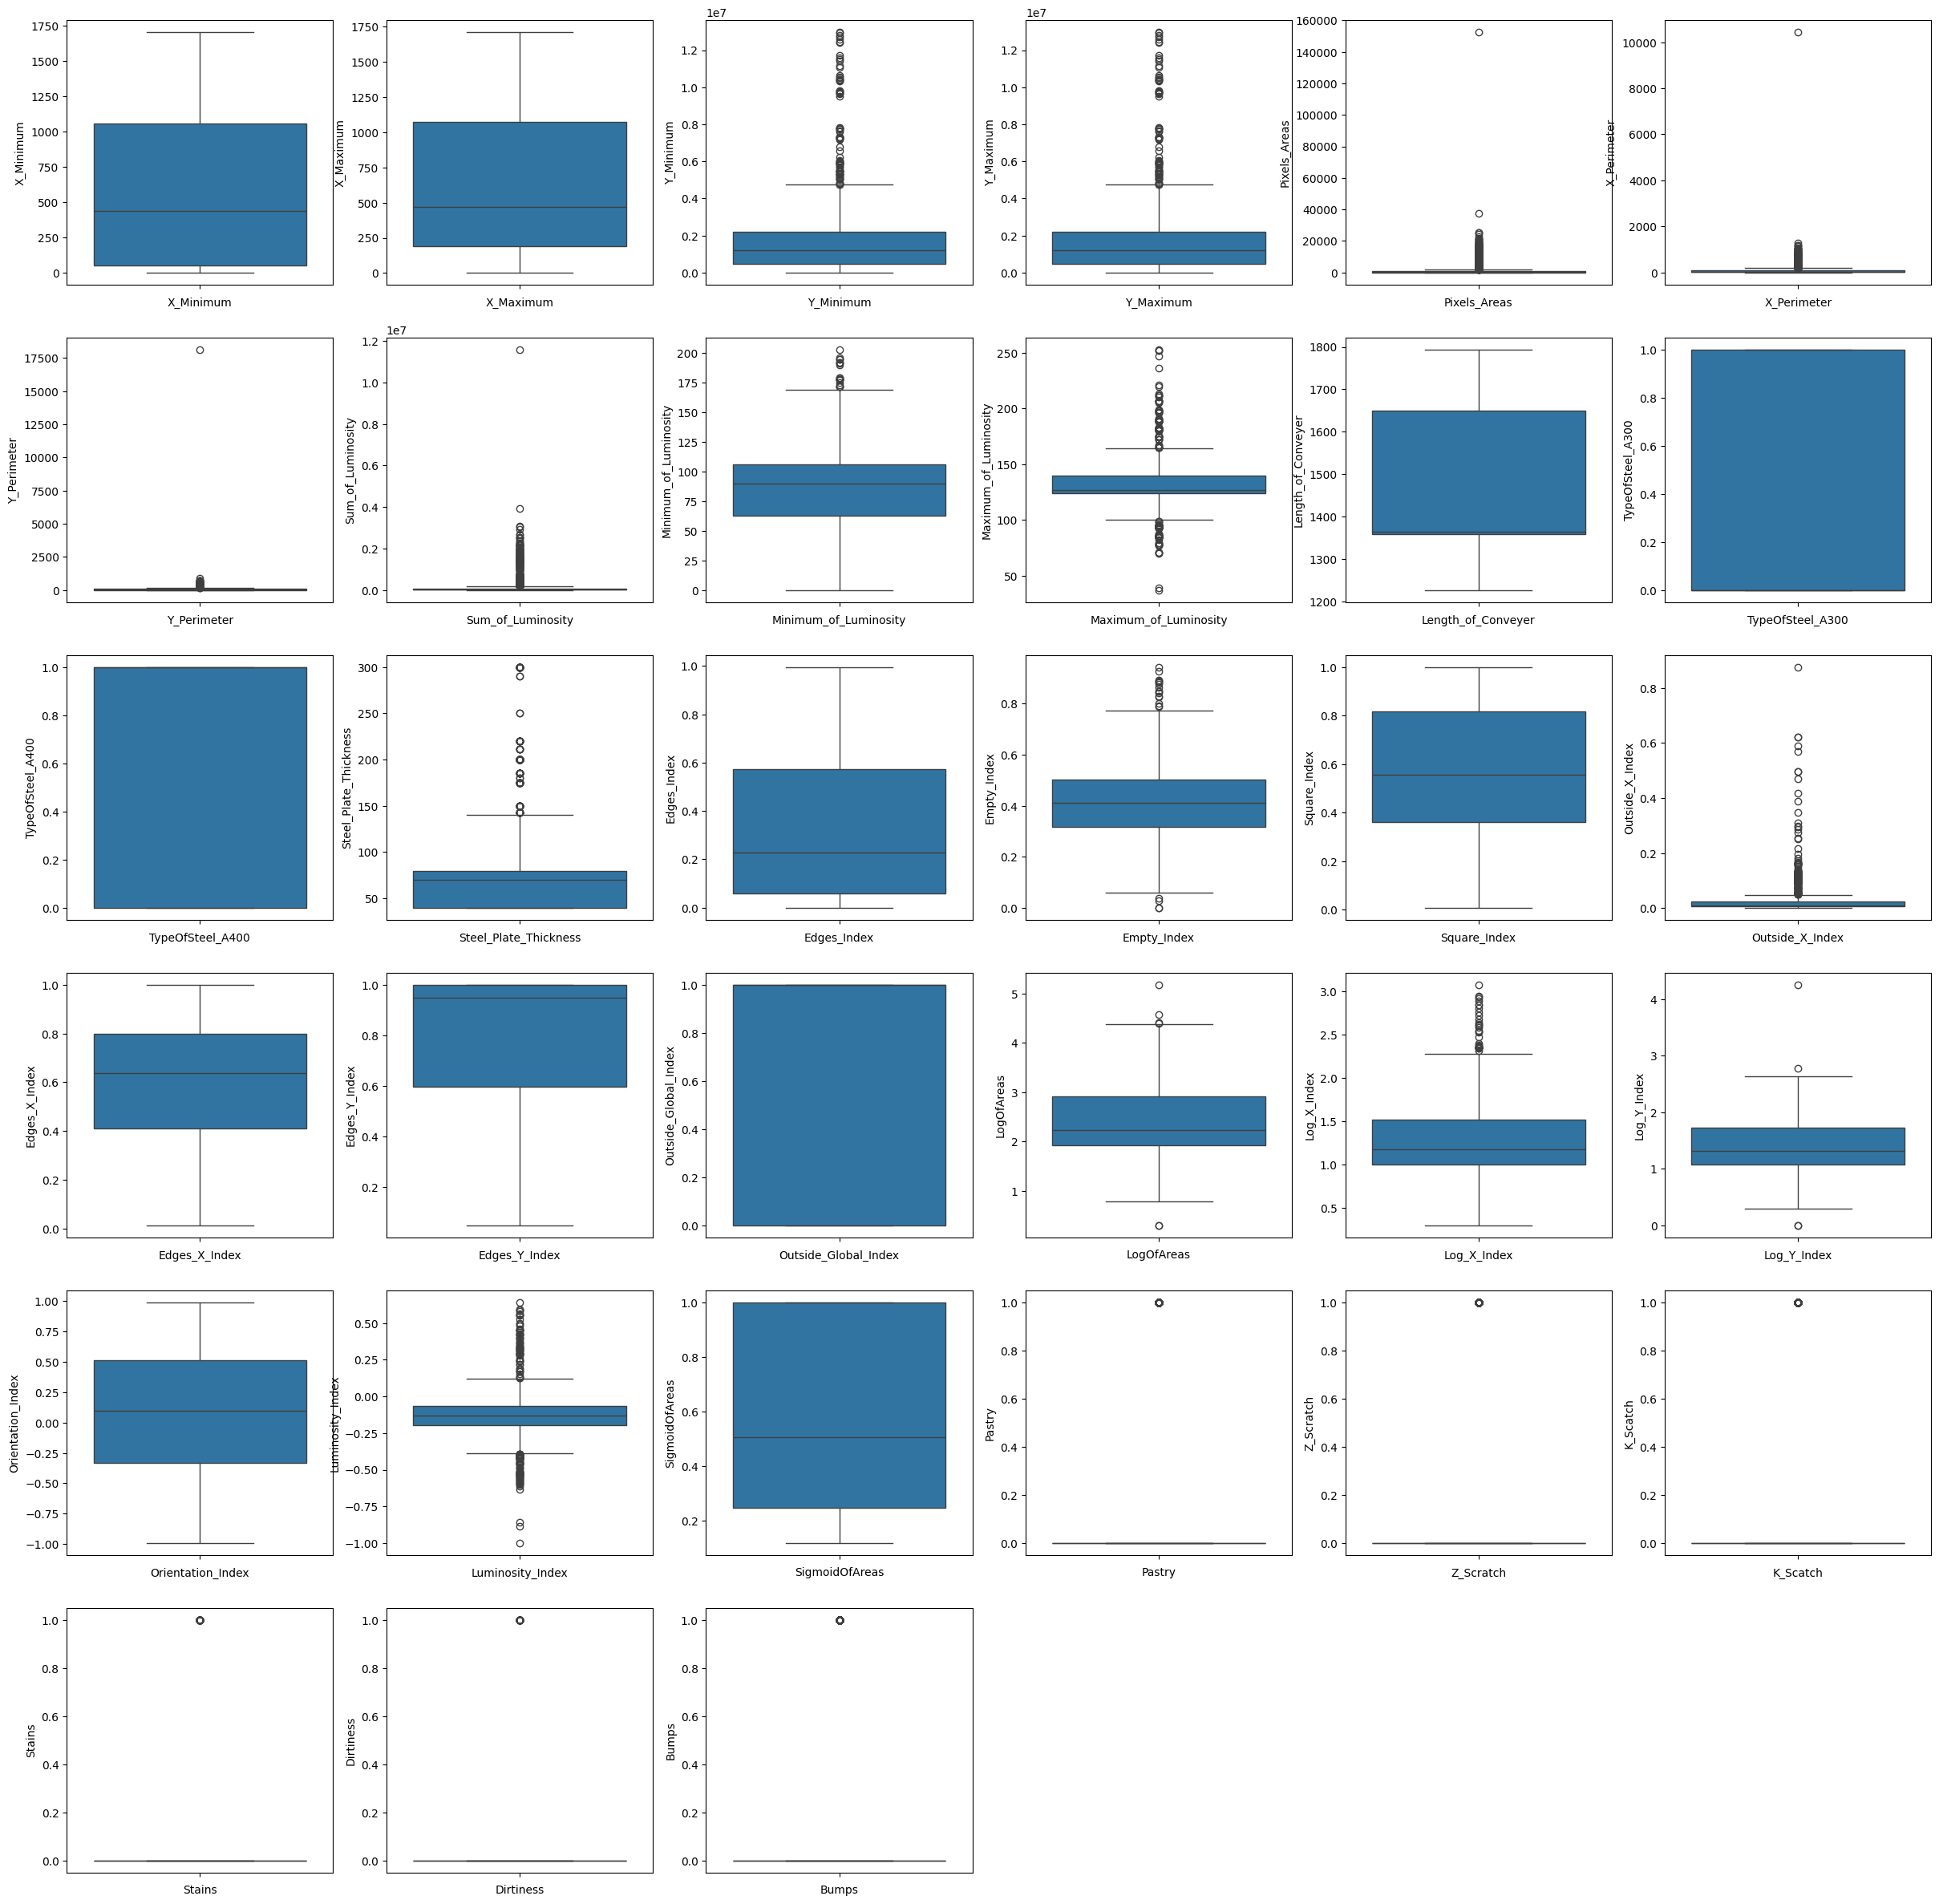

In [12]:
#Checking for the Outliers through the Box Plot
plt.figure(figsize=(30, 30))
plotnumber = 1

for column in df:
    if plotnumber <= 33:
        ax = plt.subplot(6, 6, plotnumber)
        sns.boxplot(y=df[column])
        plt.xlabel(column, fontsize=10)
    plotnumber += 1
plt.show()


#4.5 Handling Outliers

* Dropping Outliers in Pixels Areas Column
* Droping Outliers in Out X Index Column



In [13]:
#Dropping Outliers in Pixels_Areas variable
index_to_remove = [391,1592]
df.drop(index_to_remove, inplace = True)

<Axes: ylabel='Pixels_Areas'>

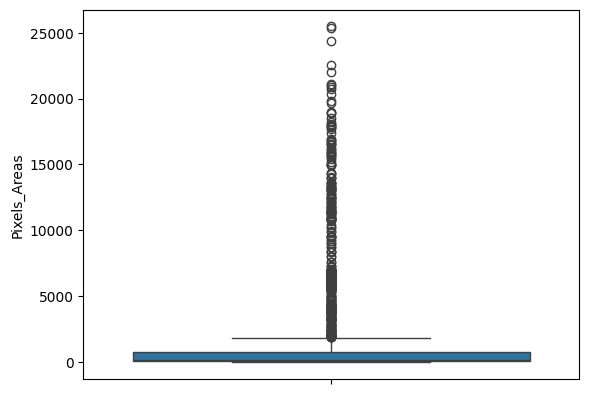

In [14]:
#Box Plot after removing outliers
sns.boxplot(df['Pixels_Areas'])

In [15]:
df[df['Outside_X_Index'] > 0.8]

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
1382,59,1245,4712084,4712115,15775,1275,276,1689009,61,135,...,-0.9739,-0.1635,1.0,0,0,0,0,0,0,1


In [16]:
#Dropping Outliers in Outside_X_Index variable
df.drop(1382,inplace = True)

<Axes: ylabel='Log_Y_Index'>

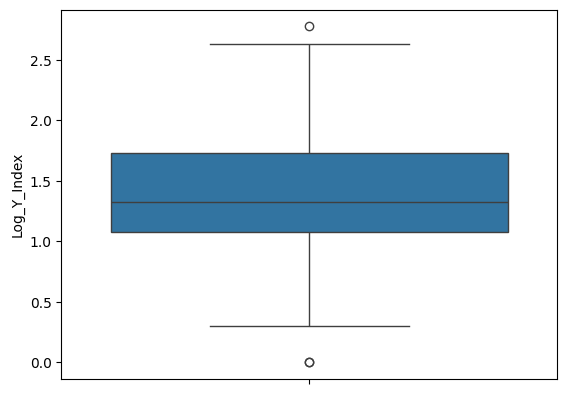

In [17]:
#Box Plot after removing outliers
sns.boxplot(df['Log_Y_Index'])

#4.6 KDE Plot

* Kde plot in subplotting of all the columns



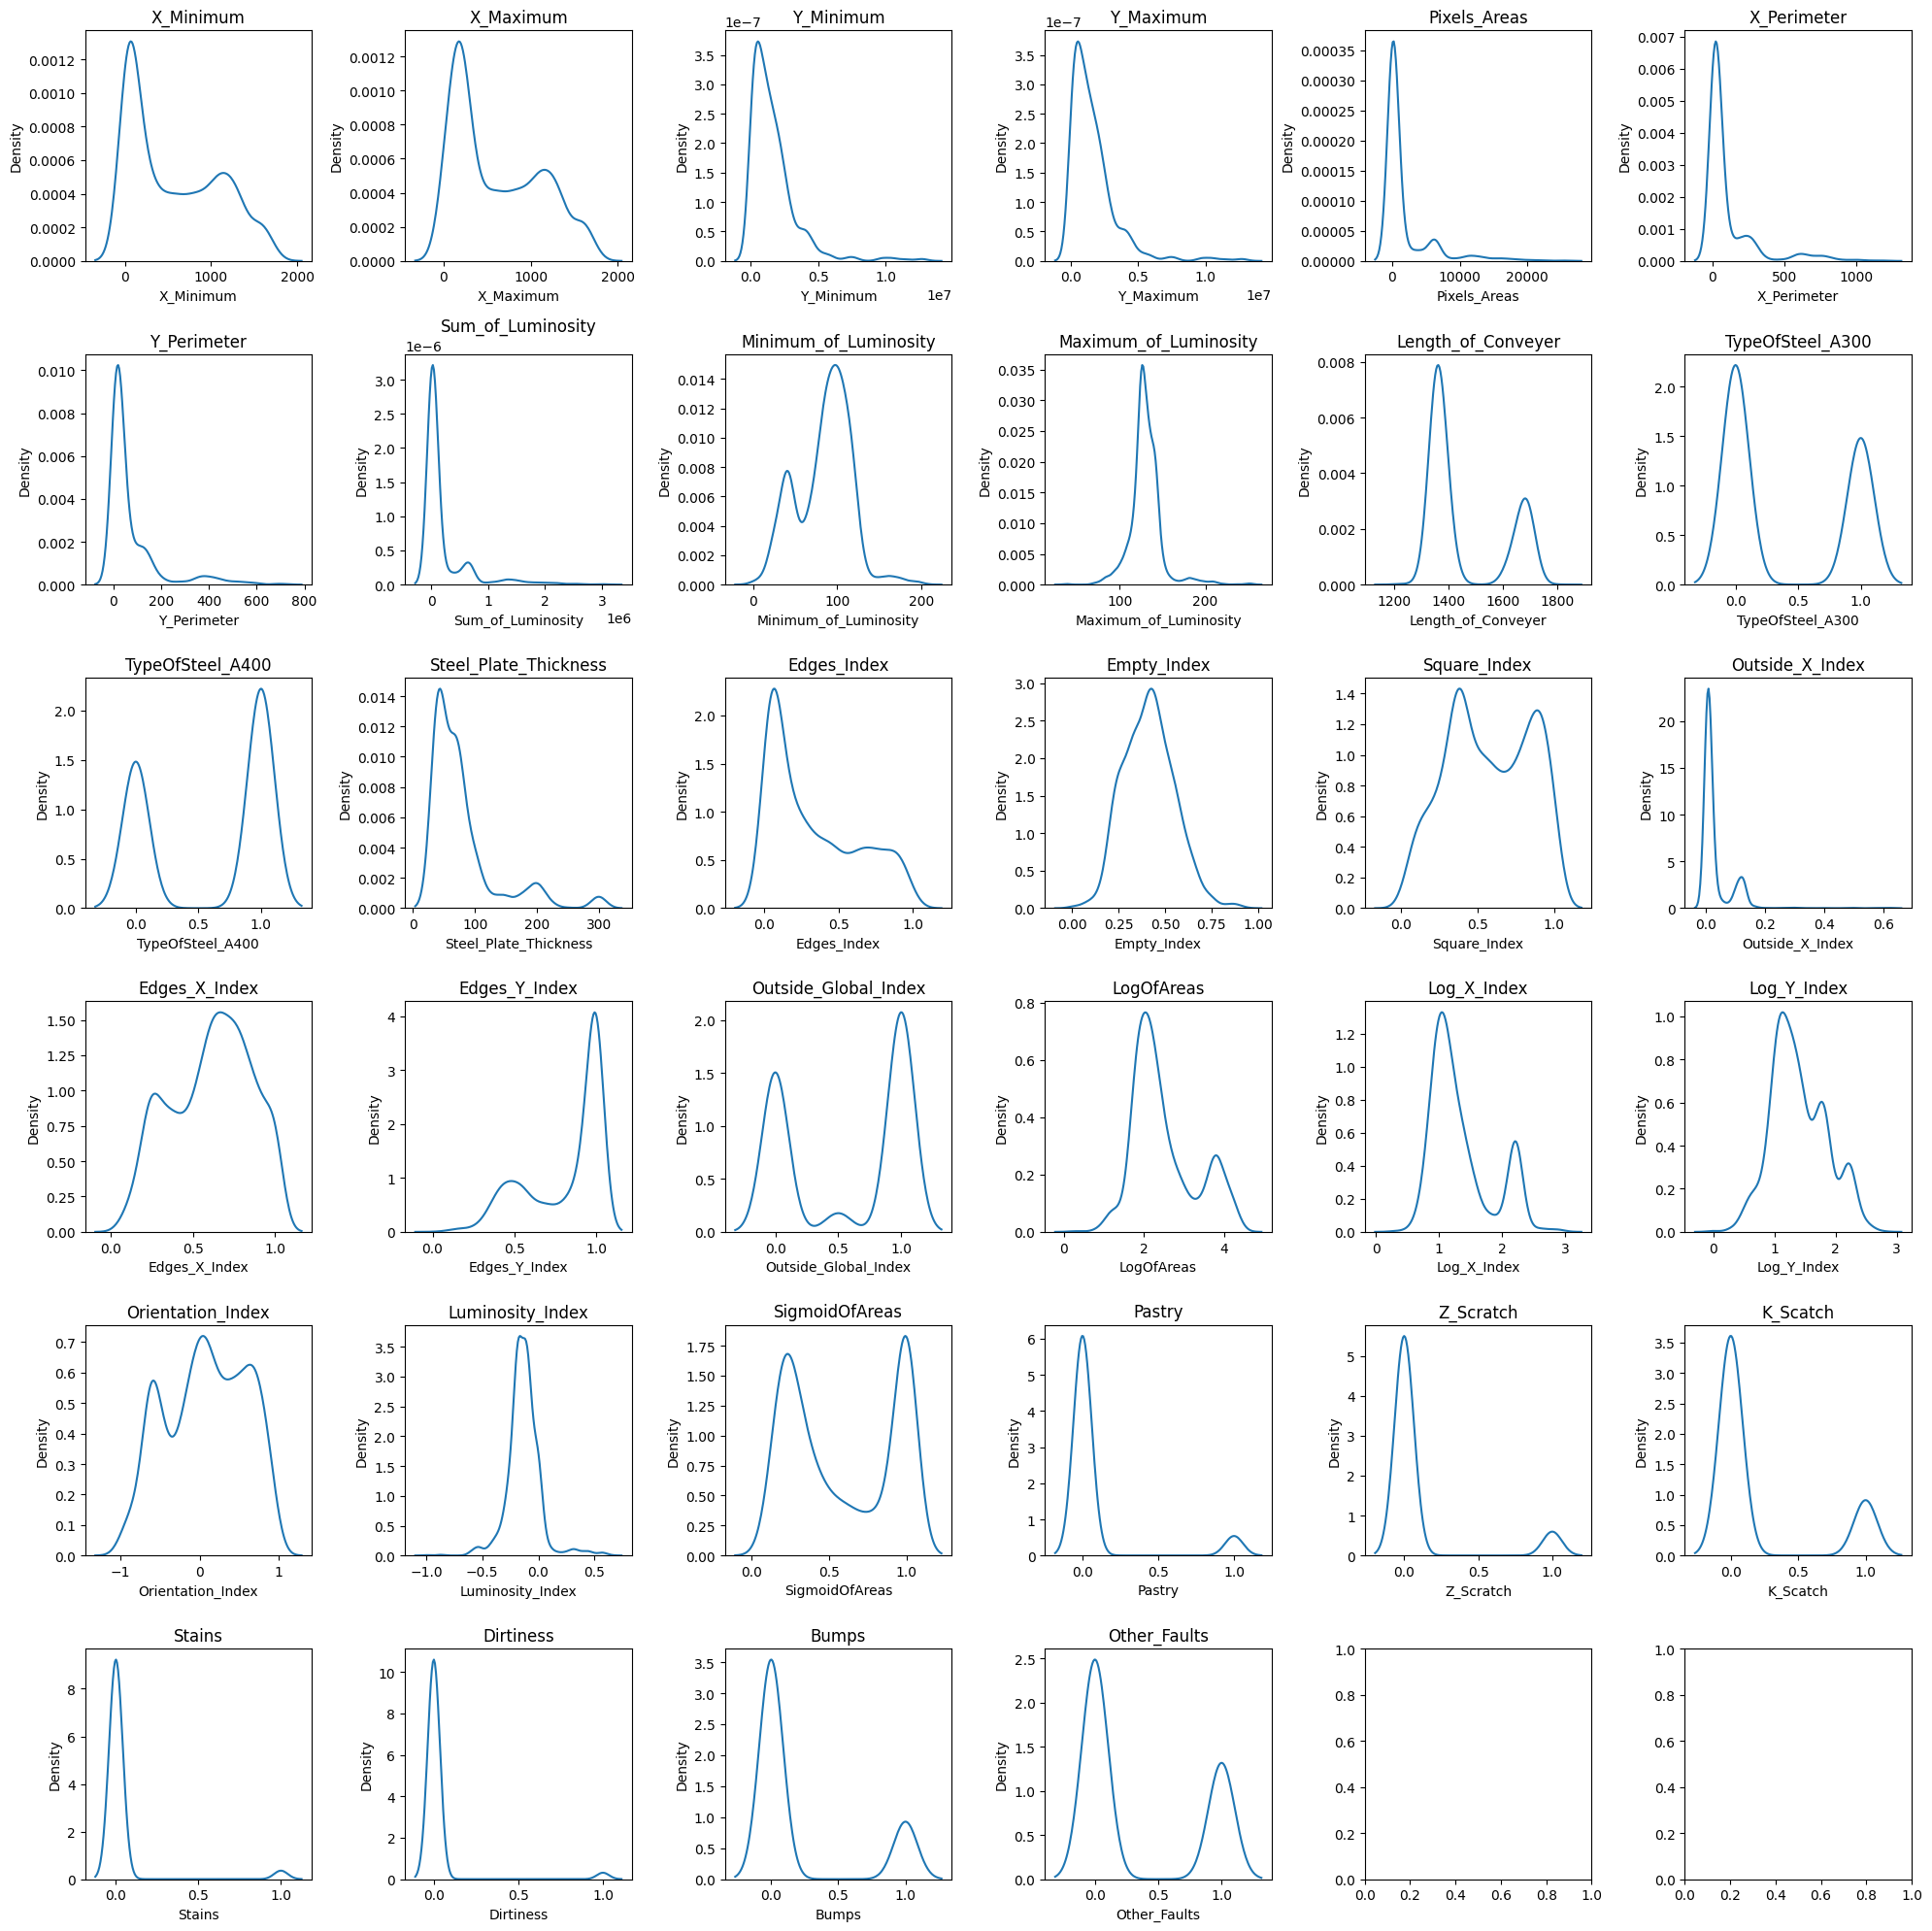

In [18]:
# Define the number of columns and rows for the subplots
ncols = 6
nrows = 6

# Create the figure and subplots
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through each column in the DataFrame
for i, col in enumerate(df.columns):
    # Plot the KDE plot for the current column
    sns.kdeplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(col)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


#4.7 Distplot

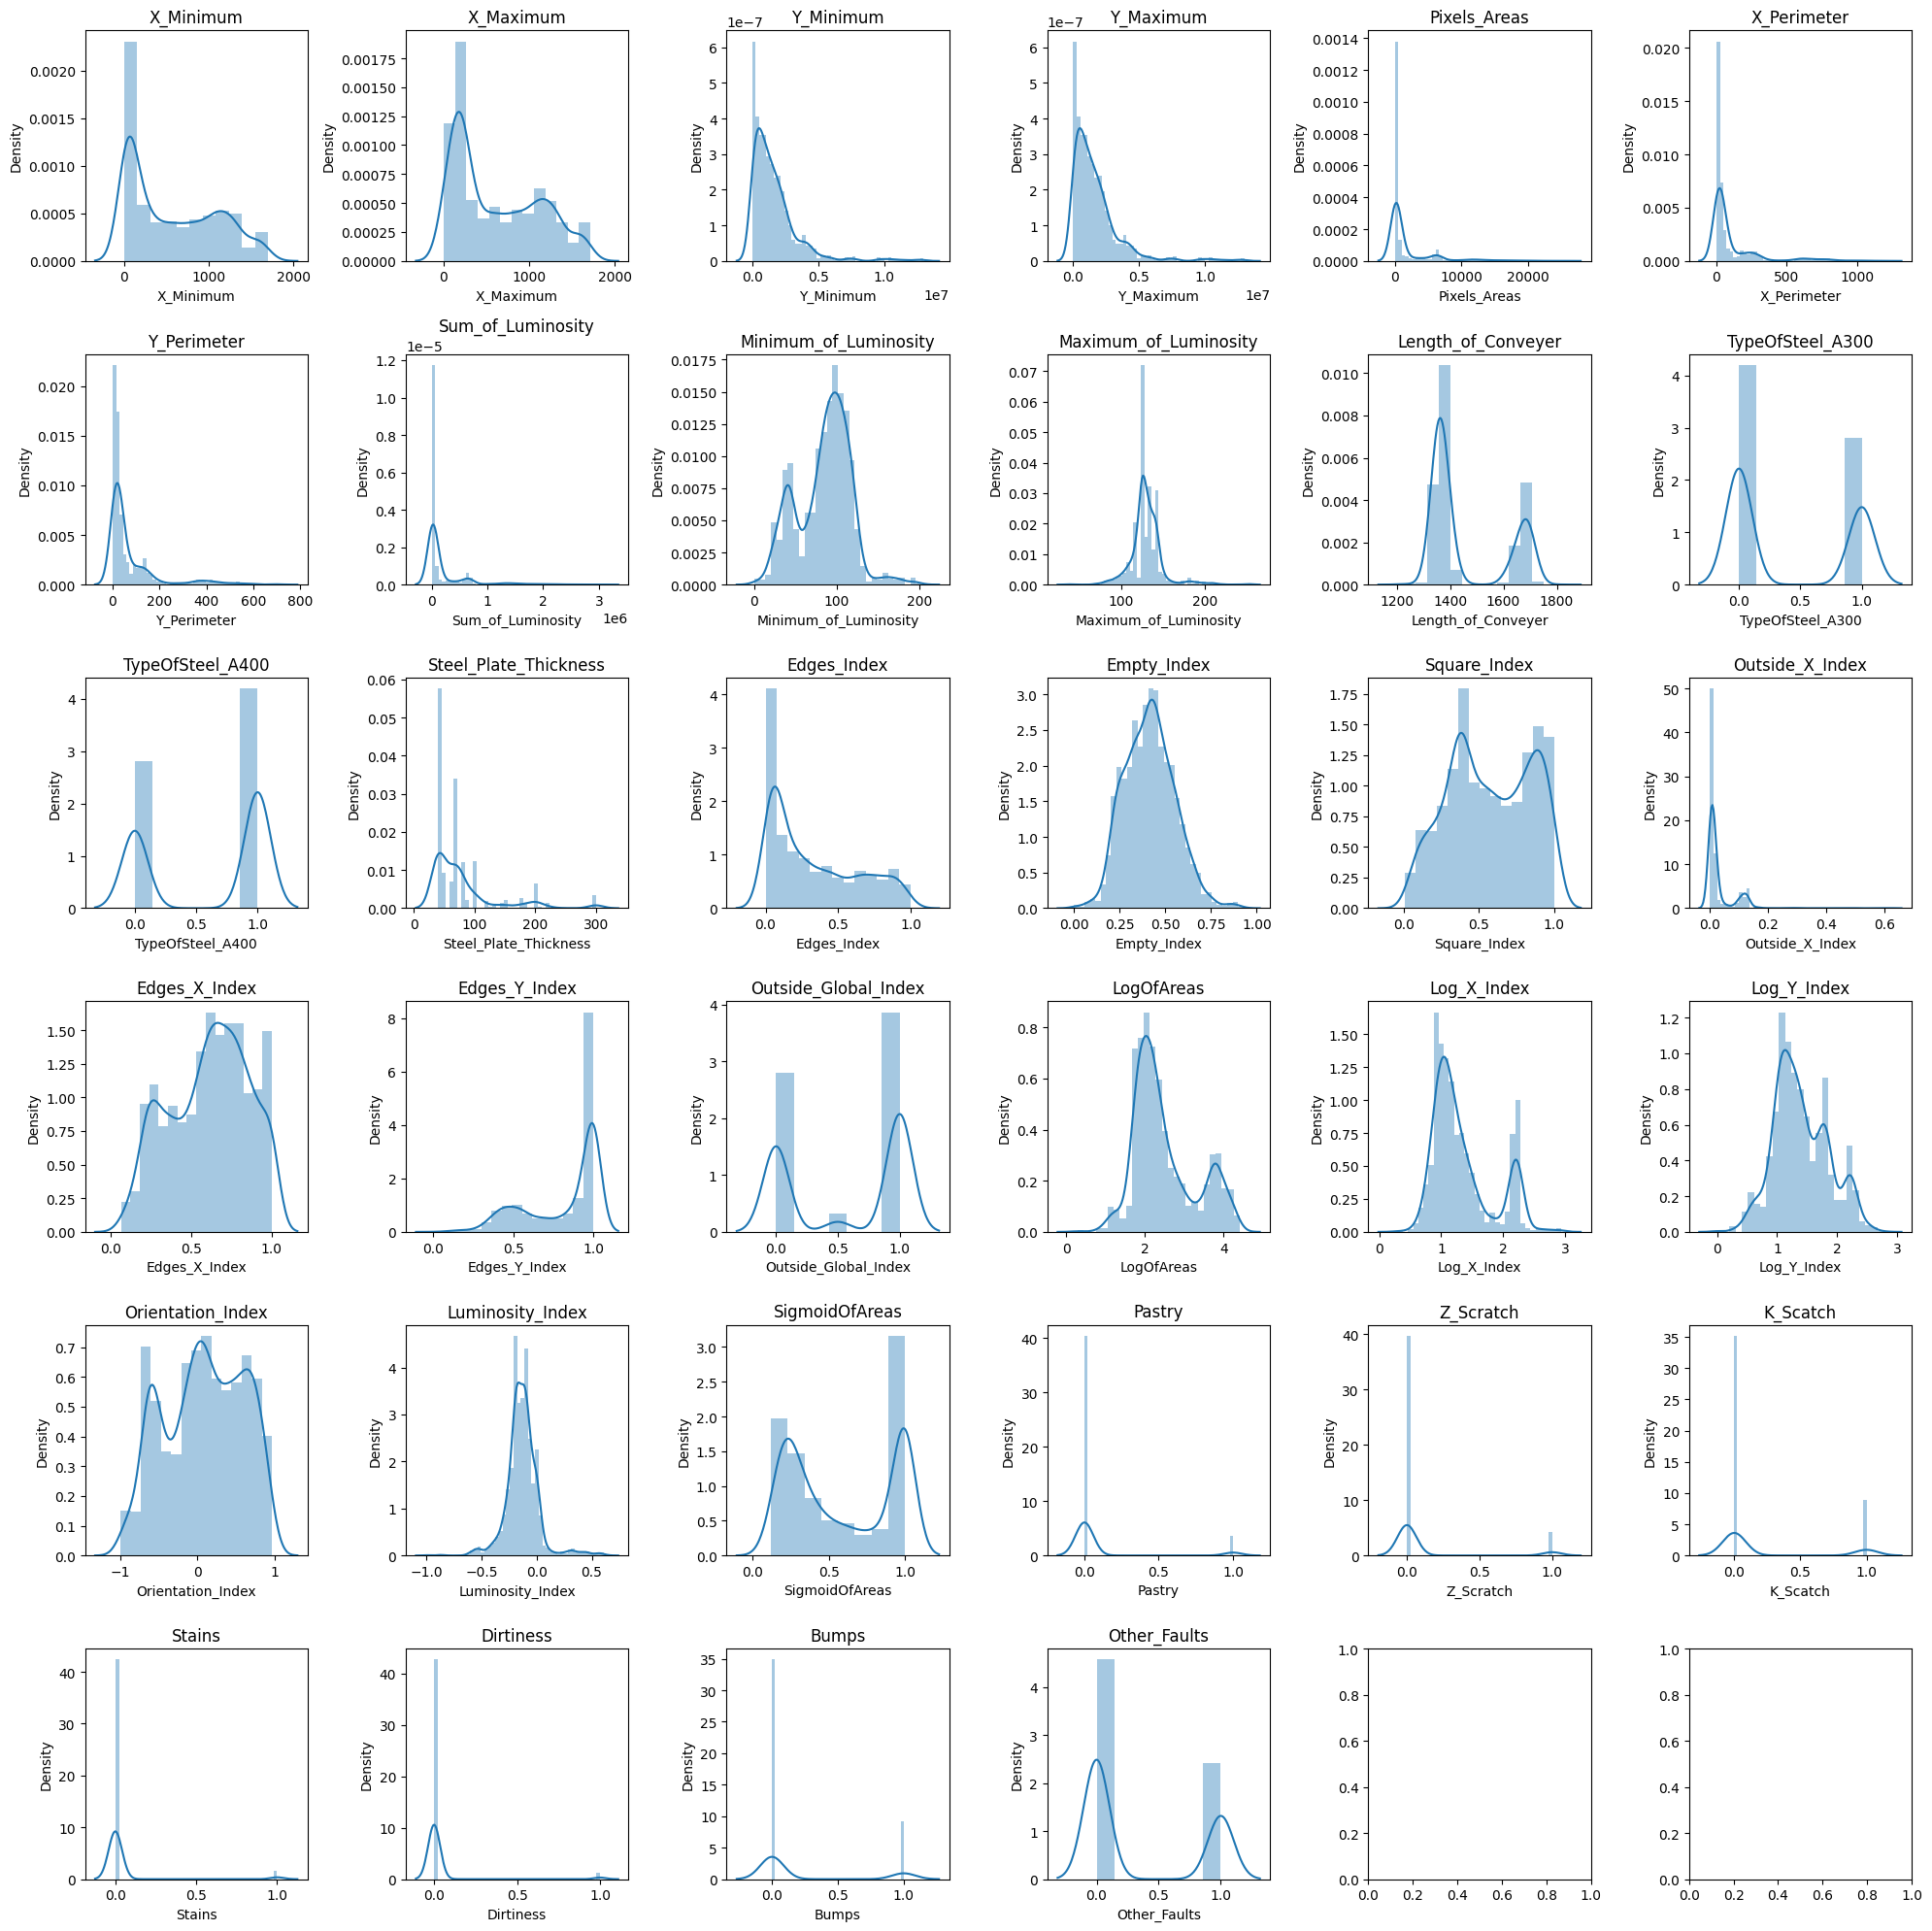

In [19]:
# Define the number of columns and rows for the subplots
ncols = 6
nrows = 6

# Create the figure and subplots
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through each column in the DataFrame
for i, col in enumerate(df.columns):
    # Plot the distplot for the current column
    sns.distplot(df[col], ax=axes[i])
    axes[i].set_title(col)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


#4.8 Bar plot of mean of type of steel A300 and Pastry

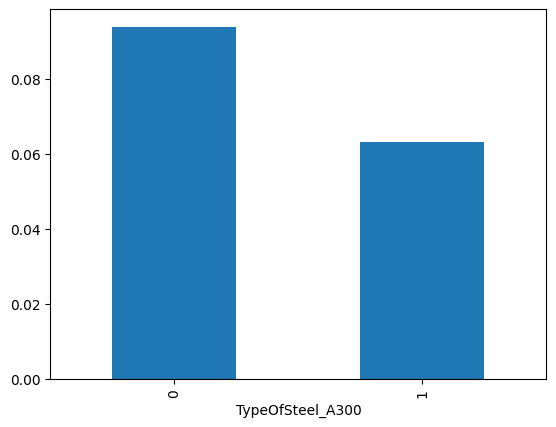

In [20]:
df.groupby('TypeOfSteel_A300')['Pastry'].mean().plot(kind='bar')
plt.show()

#4.8 Bar plot of mean of steel plate thickness and pastry

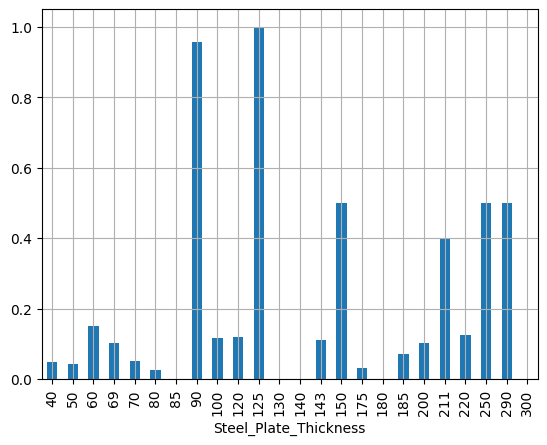

In [21]:
df.groupby('Steel_Plate_Thickness')['Pastry'].mean().plot(kind='bar')
plt.grid()
plt.show()


#4.9 Violin plot

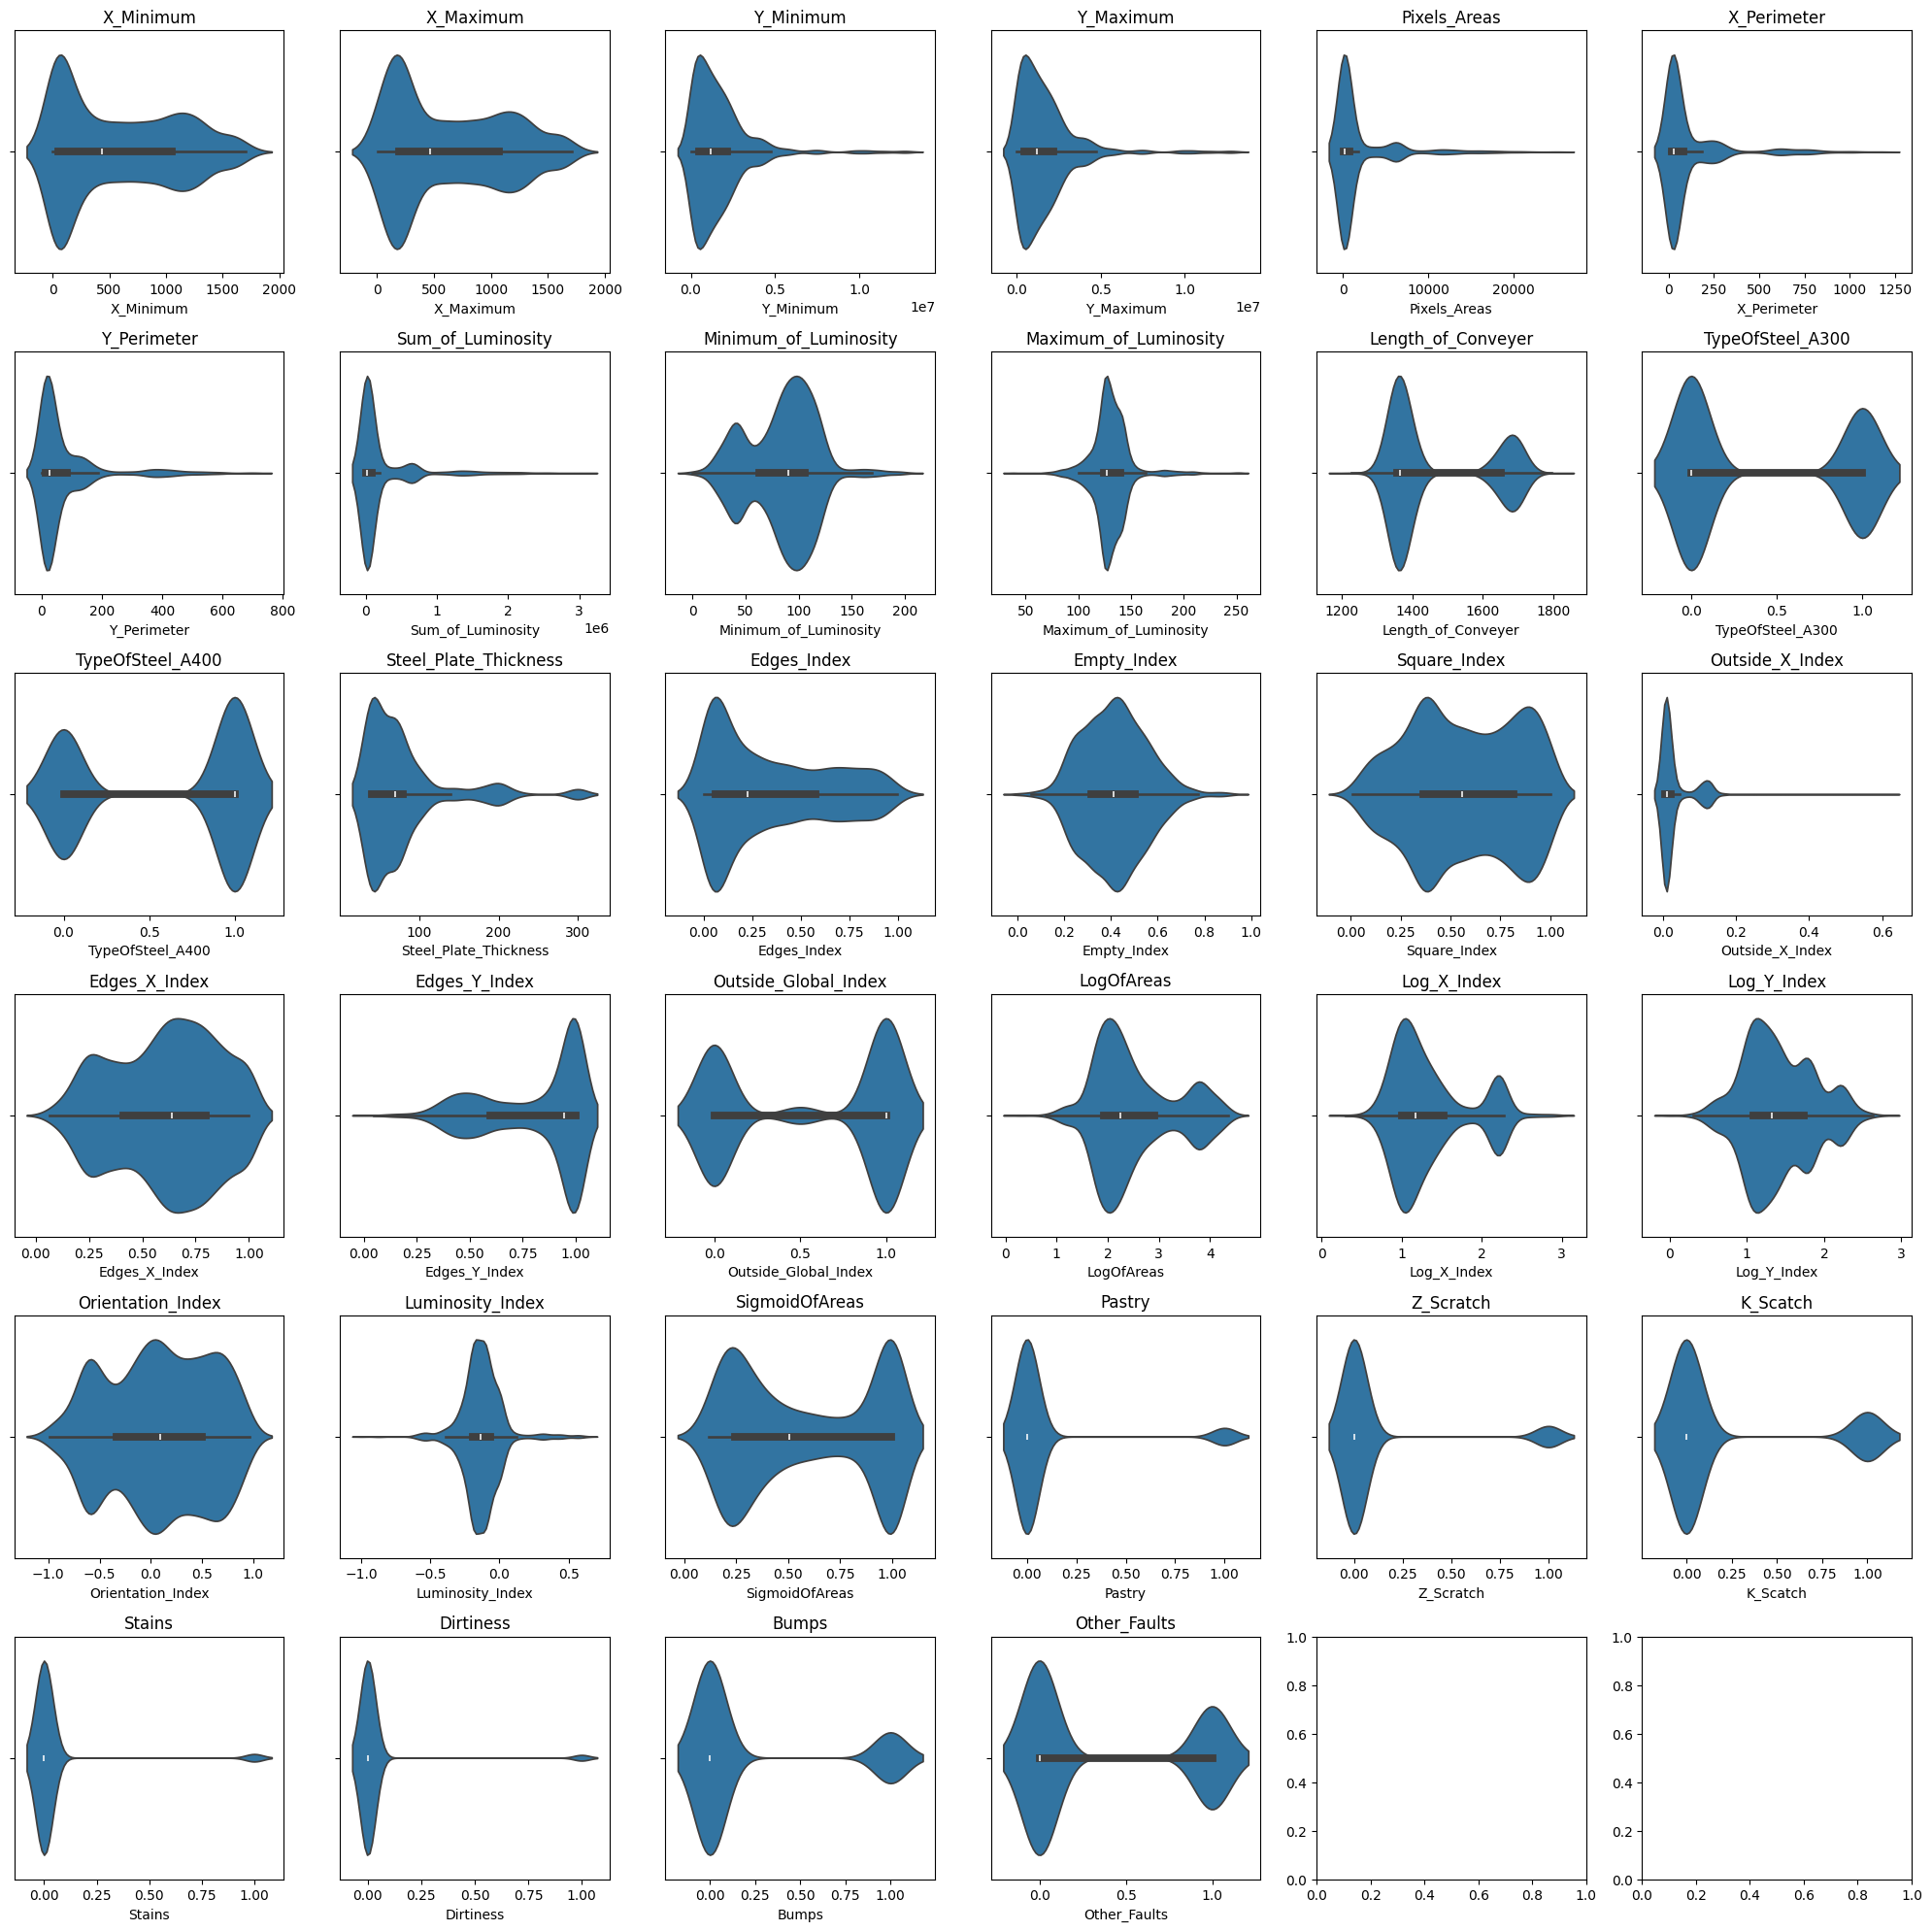

In [23]:
#violin plots for the data
# Define the number of columns and rows for the subplots
ncols = 6
nrows = 6

# Create the figure and subplots
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through each column in the DataFrame
for i, col in enumerate(df.columns):
    # Plot the violin plot for the current column
    sns.violinplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(col)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()



* Here, we can conclude that Minimum_of_Luminosity, Square_Index, Edges_X_Index, LogofArea, Log_X_Index, Log_Y_Index and Orientation_Index are Multi Model in nature.

* Steel_Plate_Thickness, Pixels_Areas, X_Perimeter, Y_Perimeter, Sum_of_Luminosity, Outside_X_Index is having Outliers


#4.10 Correlation Matrix

<Axes: >

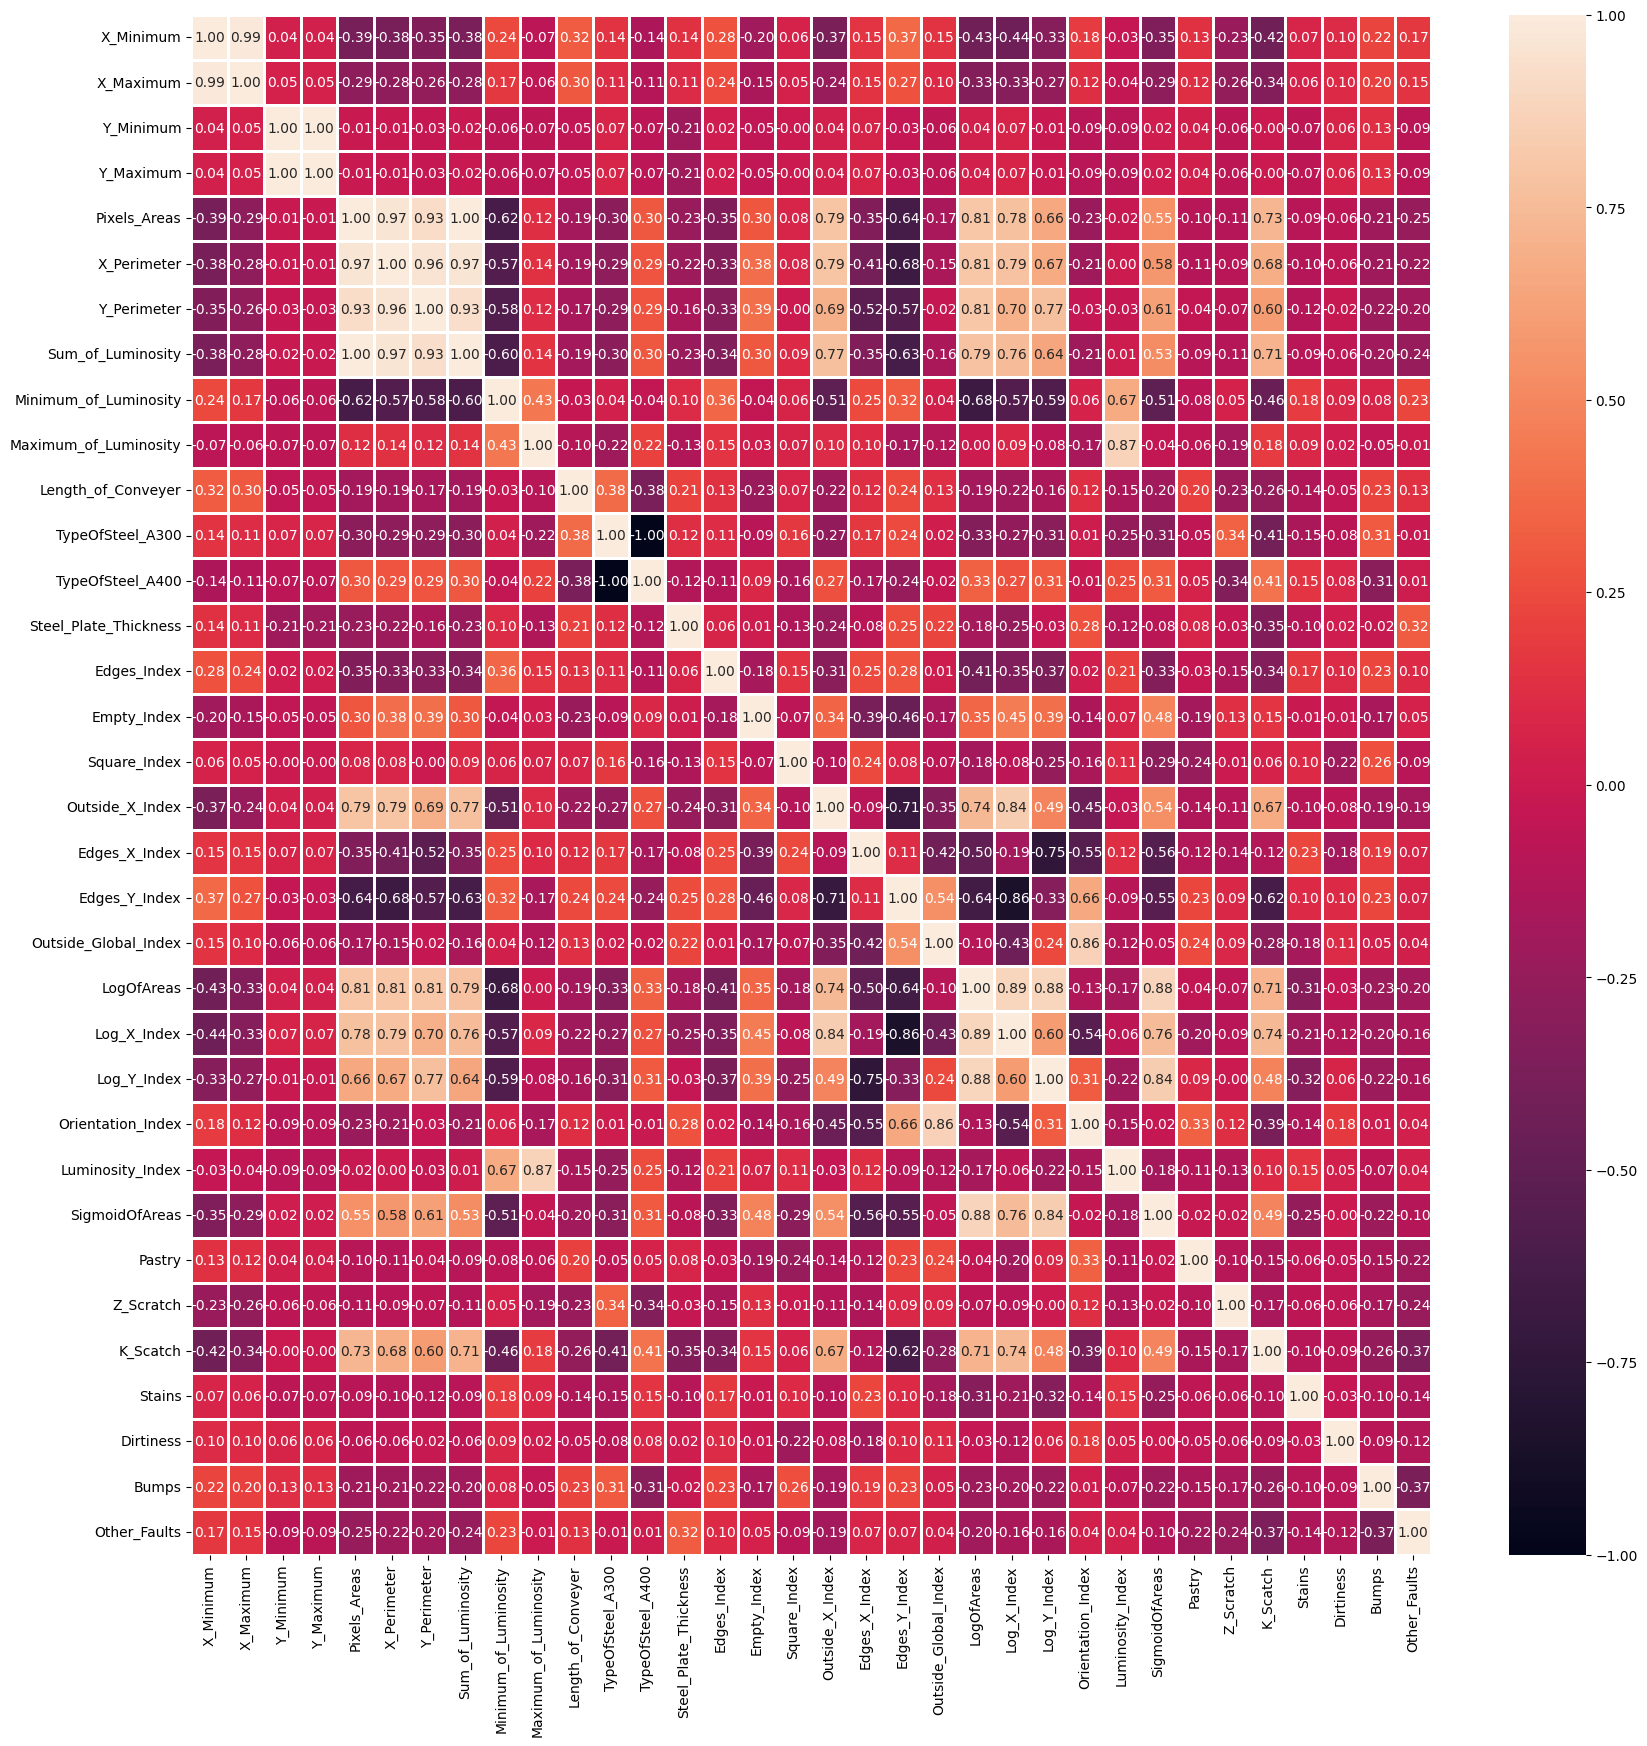

In [24]:
plt.figure(figsize = (20,20))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True,fmt = '.2f', linewidth = 2)

Log_Y_Index, K_Scatch  and Pixels_Areas are having high correlation

#**5. Declare Feature Vector and Target Variable**

In [25]:
x = df.drop(['Pastry'], axis = 1)
y = df[['Pastry']]

#**6. Feature Scaling**

In [26]:
#MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
mms  = MinMaxScaler()
num_columns = mms.fit_transform(df)
num_columns

array([[0.02463343, 0.02691633, 0.02035198, ..., 0.        , 0.        ,
        0.        ],
       [0.37829912, 0.37858397, 0.19500631, ..., 0.        , 0.        ,
        0.        ],
       [0.48621701, 0.48624927, 0.11919013, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.08504399, 0.09947338, 0.02927883, ..., 0.        , 0.        ,
        1.        ],
       [0.08035191, 0.09713283, 0.0320304 , ..., 0.        , 0.        ,
        1.        ],
       [0.73958944, 0.7472206 , 0.00625833, ..., 0.        , 0.        ,
        1.        ]])

#6.1 Pie chart of Pastry

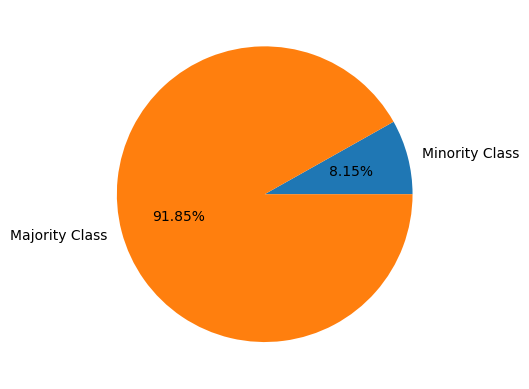

In [27]:
class_division = df[df['Pastry'] == 1].shape[0], df[df['Pastry'] == 0].shape[0]
my_labels = ['Minority Class', 'Majority Class']
plt.pie(class_division, labels = my_labels, autopct = '%.2f%%')
plt.show()

#7. SMOTE Technique

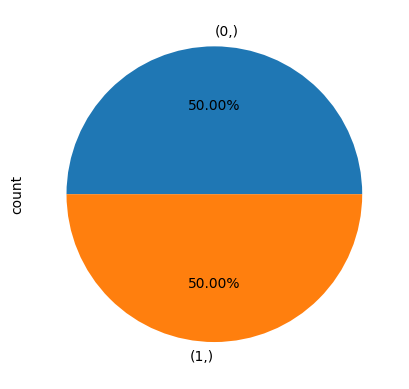

In [28]:
# prompt: apply smote for the dataset
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
x_train_oversampled, y_train_oversampled = sm.fit_resample(x, y)
ax = y_train_oversampled.value_counts().plot.pie(autopct = "%.2f%%")

#8. Split The Dataset into Training and Testing Data

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [30]:
#Shape of the training and testing data
print(x_train_oversampled.shape)
print(y_train_oversampled.shape)
print(x_test.shape)
print(y_test.shape)

(3560, 33)
(3560, 1)
(388, 33)
(388, 1)


#9. Model Training

In [31]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_oversampled,y_train_oversampled)

LogisticRegression()

#10. Training and Testing scores

In [32]:
#Training accuracy
print(lr.score(x_train_oversampled,y_train_oversampled))

#Testing accuracy
print(lr.score(x_test,y_test))

0.5918539325842697
0.3247422680412371


#10.1.  Predicting independent testing data

In [34]:
y_pred_test = lr.predict(x_test)

#11.  Accuracy Score

In [35]:
from sklearn.metrics import accuracy_score
as0 = accuracy_score(y_test, y_pred_test)
as0

0.3247422680412371

#12. Underfitting and Overfitting

In [36]:
# fit the Logsitic Regression model with C=100

# instantiate the model
lr100 = LogisticRegression(C=100, solver='liblinear', random_state=0)


# fit the model
lr100.fit(x_train_oversampled, y_train_oversampled)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [37]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(lr100.score(x_train_oversampled, y_train_oversampled)))

print('Test set score: {:.4f}'.format(lr100.score(x_test, y_test)))

Training set score: 0.7904
Test set score: 0.6881


In [38]:
y_pred_test1 = lr.predict(x_test)

In [39]:
from sklearn.metrics import classification_report
cr_test = classification_report(y_test, y_pred_test1)

print('\nClassification Report Testing Data')
print(cr_test)


Classification Report Testing Data
              precision    recall  f1-score   support

           0       0.94      0.26      0.41       348
           1       0.12      0.85      0.21        40

    accuracy                           0.32       388
   macro avg       0.53      0.56      0.31       388
weighted avg       0.85      0.32      0.39       388



#13. Accuracy Score after Overfitting

In [40]:
from sklearn.metrics import accuracy_score
as_new1 = accuracy_score(y_test, y_pred_test1)*100
as_new1

32.47422680412371

In [41]:
# check class distribution in test set

y_train_oversampled.value_counts()

Pastry
0         1780
1         1780
Name: count, dtype: int64

We can see that the occurences of most frequent class is 544. So, we can calculate null accuracy by dividing 544 by total number of occurences.

#14. Compare Null Accuracy with Model Accuracy

In [42]:
# check null accuracy score

null_accuracy = (1780/(1780 + 1780))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.5000


We can see that our model accuracy score is 0.5978 but null accuracy score is 0.50, which is less than our model accuracy. So, we can conclude that our Logistic Regression model is doing a very good job in predicting the class labels.

#15. Confusion Matrix

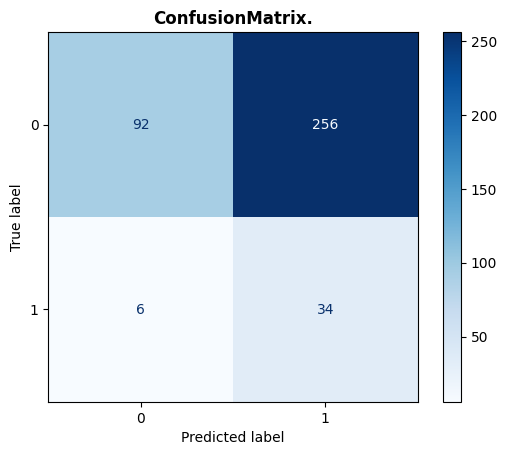

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_test = confusion_matrix(y_test, y_pred_test1)
matrix = ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = [0, 1])
matrix.plot(cmap="Blues")
plt.title("ConfusionMatrix.", weight="bold");

#16. ROC - AOC

Accuracy: 0.3247422680412371
Precision: 0.11724137931034483
Recall: 0.85
F1-Score: 0.20606060606060606
ROC-AUC Score: 0.6222701149425288


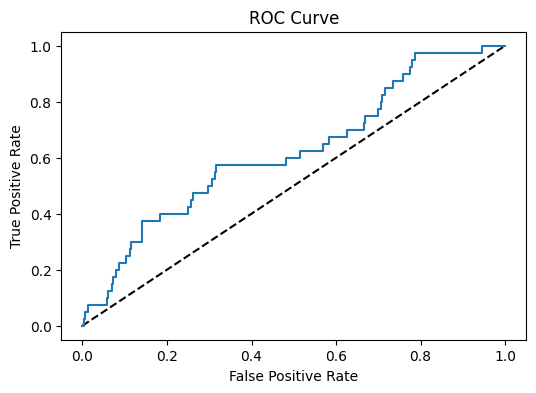

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, lr.predict_proba(x_test)[:, 1])


print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1)
print('ROC-AUC Score:', roc_auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(x_test)[:, 1])
fig = plt.figure(figsize=(6, 4))
plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal 50% line
plt.plot(fpr, tpr)  # Plot the FPR and TPR achieved by the model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

#17. ROC-AOC after Overfitting

Accuracy: 0.3247422680412371
Precision: 0.11724137931034483
Recall: 0.85
F1-Score: 0.20606060606060606
ROC-AUC Score: 0.8439655172413794


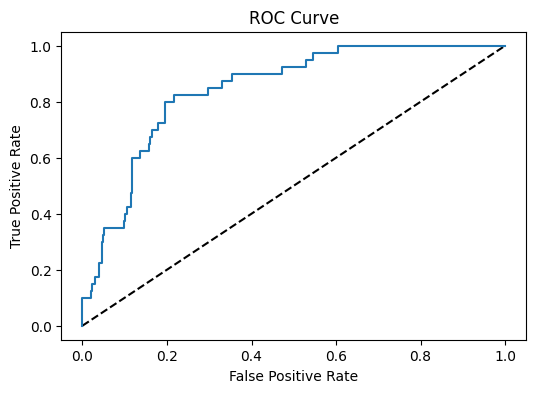

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


accuracy = accuracy_score(y_test, y_pred_test1)
precision = precision_score(y_test, y_pred_test1)
recall = recall_score(y_test, y_pred_test1)
f1 = f1_score(y_test, y_pred_test1)
roc_auc = roc_auc_score(y_test, lr100.predict_proba(x_test)[:, 1])


print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1)
print('ROC-AUC Score:', roc_auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, lr100.predict_proba(x_test)[:, 1])
fig = plt.figure(figsize=(6, 4))
plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal 50% line
plt.plot(fpr, tpr)  # Plot the FPR and TPR achieved by the model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [53]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test1)
print("Confusion Matrix\n", cm)
print("True Positive(TP): ", cm[0,0])
print("True Negative(TN): ", cm[1,1])
print("False Positive(FP): ",cm[0,1])
print("False Negative(FN): ", cm[1,0])

Confusion Matrix
 [[ 92 256]
 [  6  34]]
True Positive(TP):  92
True Negative(TN):  34
False Positive(FP):  256
False Negative(FN):  6


#18. Classification Metrics

1. Classification Report
2. Classification Accuracy
3. Classification Error
4. Precision
5. Recall
6. True Positive Rate(TPR)
7. False Positive Rate(FPR)
8. Specificity
9. F1_Score



#1. Classification Report

In [54]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred_test1)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.26      0.41       348
           1       0.12      0.85      0.21        40

    accuracy                           0.32       388
   macro avg       0.53      0.56      0.31       388
weighted avg       0.85      0.32      0.39       388



In [55]:
#Declaring TP, TN, FP and FN
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

#2. Classification Accuracy

In [56]:
#Classification Accuracy
ca = (TP + TN) / float(TP + TN + FP + FN)
print("Classification Accuracy: {0:0.4f} ".format(ca))

Classification Accuracy: 0.3247 


#3. Classification Error

In [57]:
#Classification Error
ce = (FP + FN) / float(TP + TN + FP + FN)
print("Classification Error: {0:0.4f} ".format(ce))

Classification Error: 0.6753 


#4. Precision

In [60]:
#Precision
precision = TP / float(TP + FP)
print("Precision Value: {0:0.4f}".format(precision))

Precision Value: 0.2644


#5. Recall

In [61]:
#Recall
recall = TP / float(TP + FN)
print("Recall: {0:0.4f}".format(recall))

Recall: 0.9388


#6. True Positive Rate

In [62]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9388


#7. False Positive Rate

In [63]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.8828


#8. Specificity

In [64]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.1172


#9. F1_Score

In [66]:
#F1_Score
from sklearn.metrics import f1_score
F1_Score = 2*(0.9194*1.0000) / (0.9194 + 1.000)
print("F1 Score: {0:0.4f}".format(F1_Score))

F1 Score: 0.9580


#**19. Predict Results**

In [67]:
lr.predict([[45, 50, 270850, 280950, 270, 18, 45, 25200, 80, 110, 1750, 1,0, 85, 0.0598, 0.2541, 0.1978, 0.0048, 0.4802, 1.5, 1.4, 2.5654, 0.9042, 1.6434, 0.8185, -0.2915, 0.6022, 1,0,0,0,0,0 ]])

array([1])

#**20. Predict Proba Method**

In [68]:
# probability of getting output as 0 - no faulty

lr.predict_proba(x_test)[:2,0:2]

array([[0.39728835, 0.60271165],
       [0.41917246, 0.58082754]])

In [69]:
# probability of getting output as 1 - faulty

lr.predict_proba(x_test)[:2,1:4]

array([[0.60271165],
       [0.58082754]])

#**21. Various Algorithms**

#21.1 Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth = 8, criterion = 'entropy', max_leaf_nodes = 5, max_features = 12)
dtc.fit(x_train_oversampled, y_train_oversampled)
y_pred1 = dtc.predict(x_test)

In [71]:
#Accuracy Score for Decision Tree
from sklearn.metrics import accuracy_score
as1 = accuracy_score(y_test, y_pred1)*100
as1

89.17525773195877

In [72]:
#Classification Report for Decision Tree
from sklearn.metrics import classification_report
cr1= classification_report(y_test, y_pred1)
print(cr1)

              precision    recall  f1-score   support

           0       0.99      0.89      0.94       348
           1       0.49      0.90      0.63        40

    accuracy                           0.89       388
   macro avg       0.74      0.90      0.78       388
weighted avg       0.94      0.89      0.91       388



#21.2 Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 50, criterion = 'gini', max_depth = 15)
rfc.fit(x_train_oversampled, y_train_oversampled)
y_pred2 = rfc.predict(x_test)


In [81]:
rfc.predict([[45, 50, 270850, 280950, 270, 18, 45, 25200, 80, 110, 1750, 1,0, 85, 0.0598, 0.2541, 0.1978, 0.0048, 0.4802, 1.5, 1.4, 2.5654, 0.9042, 1.6434, 0.8185, -0.2915, 0.6022, 1,0,0,0,0,0 ]])

array([0])

In [82]:
print("Training Score: ", rfc.score(x_train_oversampled, y_train_oversampled))
print("Testing Score: ", rfc.score(x_test, y_test))

Training Score:  1.0
Testing Score:  1.0


In [83]:
#Accuracy Score for Random Forest
from sklearn.metrics import accuracy_score
as2 = accuracy_score(y_test, y_pred2)
as2

1.0

In [84]:
#Classification Report for Random Forest
from sklearn.metrics import classification_report
cr2 = classification_report(y_test, y_pred2)
print(cr2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       348
           1       1.00      1.00      1.00        40

    accuracy                           1.00       388
   macro avg       1.00      1.00      1.00       388
weighted avg       1.00      1.00      1.00       388



In [85]:
# fit the Logsitic Regression model with C=100

# instantiate the model
rfc1= RandomForestClassifier(n_estimators = 50, criterion = 'gini', max_depth = 15)


# fit the model
rfc1.fit(x_train_oversampled, y_train_oversampled)

RandomForestClassifier(max_depth=15, n_estimators=50)

In [86]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(rfc1.score(x_train_oversampled, y_train_oversampled)))

print('Test set score: {:.4f}'.format(rfc1.score(x_test, y_test)))

Training set score: 1.0000
Test set score: 1.0000


In [87]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix\n", cm)
print("True Positive(TP): ", cm[0,0])
print("True Negative(TN): ", cm[1,1])
print("False Positive(FP): ",cm[0,1])
print("False Negative(FN): ", cm[1,0])

Confusion Matrix
 [[348   0]
 [  0  40]]
True Positive(TP):  348
True Negative(TN):  40
False Positive(FP):  0
False Negative(FN):  0


#Classification Metrics For Random Forest Classifier
1. Classification Accuracy
2. Classification Error
3. Precision
4. Recall
5. True Positive Rate
6. False Positive Rate
7. F1_Score

In [88]:
#Declaring TP, TN, FP and FN
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [89]:
#Classification Accuracy
ca = (TP + TN) / float(TP + TN + FP + FN)
print("Classification Accuracy: {0:0.4f} ".format(ca))

Classification Accuracy: 1.0000 


In [90]:
#Classification Error
ce = (FP + FN) / float(TP + TN + FP + FN)
print("Classification Error: {0:0.4f} ".format(ce))

Classification Error: 0.0000 


In [91]:
#Precision
precision = TP / float(TP + FP)
print("Precision Value: {0:0.4f}".format(precision))

Precision Value: 1.0000


In [92]:
#Recall
recall = TP / float(TP + FN)
print("Recall: {0:0.4f}".format(recall))

Recall: 1.0000


In [93]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 1.0000


In [94]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0000


In [95]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 1.0000


In [96]:
#F1_Score
from sklearn.metrics import f1_score
F1_Score = 2*(0.9194*1.0000) / (0.9194 + 1.000)
print("F1 Score: {0:0.4f}".format(F1_Score))

F1 Score: 0.9580


#ROC-AOC Curve for Random Forest Classifier

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
ROC-AUC Score: 0.9999999999999999


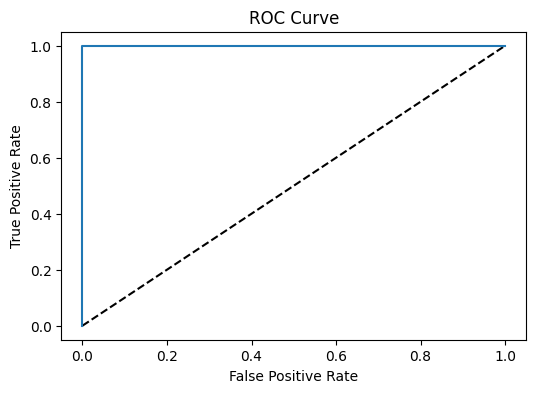

In [102]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


accuracy = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)
roc_auc = roc_auc_score(y_test, rfc.predict_proba(x_test)[:, 1])


print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1)
print('ROC-AUC Score:', roc_auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(x_test)[:, 1])
fig = plt.figure(figsize=(6, 4))
plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal 50% line
plt.plot(fpr, tpr)  # Plot the FPR and TPR achieved by the model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

The accuracy from ROC-AOC is 83% and the precision, recall, accuracy and error are best values for random forest classifier. So, we confirm that the Random Forest Classifier is the best fit.

#21.3  K-Nearest Neighbours Classifier

In [103]:
from sklearn.neighbors import KNeighborsClassifier


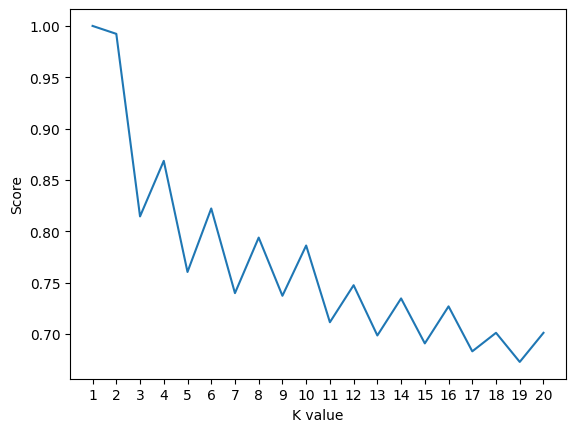

KNN best accuracy: 100.00%


In [104]:
  scoreListknn = []
  for i in range(1,21):
      KNclassifier = KNeighborsClassifier(n_neighbors = i)
      KNclassifier.fit(x_train_oversampled, y_train_oversampled)
      scoreListknn.append(KNclassifier.score(x_test, y_test))

  plt.plot(range(1,21), scoreListknn)
  plt.xticks(np.arange(1,21,1))
  plt.xlabel("K value")
  plt.ylabel("Score")
  plt.show()
  KNAcc = max(scoreListknn)
  print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

In [105]:
from sklearn.neighbors import KNeighborsClassifier
knnclassifier=KNeighborsClassifier(n_neighbors = 2)
knnclassifier.fit(x_train_oversampled,y_train_oversampled)
y_pred3 = knnclassifier.predict(x_test)


In [106]:
#Accuracy Score for KNN Classifier
as3 = accuracy_score(y_test,y_pred3)
as3

0.9922680412371134

In [107]:
#Classification Report for KNN Classifier
cr3 = classification_report(y_test,y_pred3)
print(cr3)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       348
           1       1.00      0.93      0.96        40

    accuracy                           0.99       388
   macro avg       1.00      0.96      0.98       388
weighted avg       0.99      0.99      0.99       388



Accuracy: 0.9922680412371134
Precision: 1.0
Recall: 0.925
F1-Score: 0.961038961038961
ROC-AUC Score: 0.9889008620689657


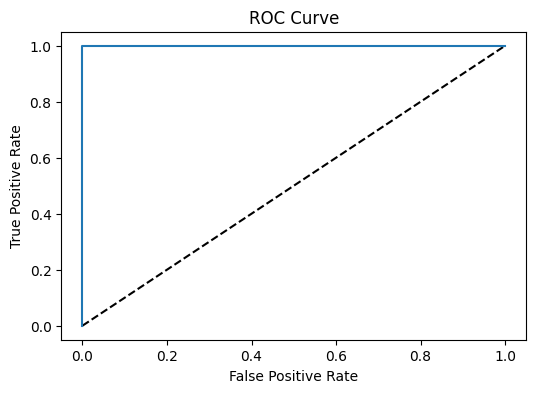

In [108]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


accuracy = accuracy_score(y_test, y_pred3)
precision = precision_score(y_test, y_pred3)
recall = recall_score(y_test, y_pred3)
f1 = f1_score(y_test, y_pred3)
roc_auc = roc_auc_score(y_test, knnclassifier.predict_proba(x_test)[:, 1])


print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1)
print('ROC-AUC Score:', roc_auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(x_test)[:, 1])
fig = plt.figure(figsize=(6, 4))
plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal 50% line
plt.plot(fpr, tpr)  # Plot the FPR and TPR achieved by the model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

#21.4  Naive Bayes Classifier

In [112]:
from sklearn.naive_bayes import GaussianNB

naive_b = GaussianNB()
naive_b.fit(x_train_oversampled, y_train_oversampled)
y_pred4 = naive_b.predict(x_test)


In [117]:
#Accuracy Score for Naive Bayes
from sklearn.metrics import accuracy_score
as4 = accuracy_score(y_test, y_pred4)
as4

0.30670103092783507

In [116]:
#Classification Report for Naive Bayes
cr4 = classification_report(y_test, y_pred4)
print(cr4)

              precision    recall  f1-score   support

           0       0.98      0.23      0.38       348
           1       0.12      0.95      0.22        40

    accuracy                           0.31       388
   macro avg       0.55      0.59      0.30       388
weighted avg       0.89      0.31      0.36       388



#21.5 Support Vector Machine

In [119]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf',degree=5,gamma='scale')
svc.fit(x_train_oversampled, y_train_oversampled)
y_pred5 = svc.predict(x_test)


In [120]:
#Accuracy Score for SVM
from sklearn.metrics import accuracy_score
as5 = accuracy_score(y_test, y_pred5)
as5

0.28865979381443296

In [121]:
#Classification Report for SVM
cr5 = classification_report(y_test, y_pred5)
print(cr5)

              precision    recall  f1-score   support

           0       0.97      0.21      0.35       348
           1       0.12      0.95      0.22        40

    accuracy                           0.29       388
   macro avg       0.55      0.58      0.28       388
weighted avg       0.89      0.29      0.34       388



In [122]:
#Overall Results
print('The accuracy score of logistic regression:', as0)
print('The accuracy score of logistic regression after overfitting: ', as_new1)
print('The accuracy score of decisiontreeclassifier:',as1)
print('The accuracy score of randomforestclassifier:',as2)
print('The accuracy score of kNN:',as3)
print('The accuracy score of Naive Bayes:',as4)
print('The accuracy score of SVC:',as5)

The accuracy score of logistic regression: 0.3247422680412371
The accuracy score of logistic regression after overfitting:  32.47422680412371
The accuracy score of decisiontreeclassifier: 89.17525773195877
The accuracy score of randomforestclassifier: 1.0
The accuracy score of kNN: 0.9922680412371134
The accuracy score of Naive Bayes: 0.30670103092783507
The accuracy score of SVC: 0.28865979381443296


#**22. Features Scores**

In [123]:
# Create the feature importances Series
fscores = pd.Series(rfc.feature_importances_, index=x_train_oversampled.columns).sort_values(ascending=False)
fscores

Other_Faults             0.126715
Orientation_Index        0.122276
Edges_Y_Index            0.074050
Log_X_Index              0.067798
Bumps                    0.066539
Length_of_Conveyer       0.059758
Outside_X_Index          0.053227
Square_Index             0.040835
Outside_Global_Index     0.037862
Log_Y_Index              0.037097
Empty_Index              0.032722
Minimum_of_Luminosity    0.028721
Y_Perimeter              0.020157
TypeOfSteel_A300         0.019954
Steel_Plate_Thickness    0.019552
SigmoidOfAreas           0.018426
Z_Scratch                0.018376
Pixels_Areas             0.013374
Edges_Index              0.013212
Dirtiness                0.013189
K_Scatch                 0.012178
Edges_X_Index            0.011943
X_Minimum                0.010742
Maximum_of_Luminosity    0.010334
Y_Maximum                0.010298
Luminosity_Index         0.010199
Sum_of_Luminosity        0.010008
X_Perimeter              0.009592
Y_Minimum                0.009504
LogOfAreas    

In [124]:
import plotly.express as px
fig = px.bar(fscores, x=fscores.values, y=fscores.index, orientation='h',
             title='Feature Importances', labels={'y': 'Feature', 'x': 'Importance'})
fig.show()

from the above code features we can observe that maximum important features are Other_Faults and Edges_Y_Index.

#23. K-Fold Cross Validation Score

In [130]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
logreg=LogisticRegression()
print(cross_val_score(logreg,x,y,cv=10,scoring='accuracy').mean())

0.917961113188398


In [131]:
dt=DecisionTreeClassifier(max_depth=5,criterion='gini',max_features=6)
print(cross_val_score(dt,x,y,cv=10,scoring='accuracy').mean())

0.8916537578120828


In [132]:
rfc=RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=5)
print(cross_val_score(rfc,x,y,cv=10,scoring='accuracy').mean())

0.9267426953688371


In [129]:
knn=KNeighborsClassifier(n_neighbors=4)
print(cross_val_score(knn,x,y,cv=10,scoring='accuracy').mean())

0.9143501949682176


#**24. Hyperparameter Optimization using GridSearchCV**

In [133]:

from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 70, 80, 90, 120, 100, 150],
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 8, 6, 5]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(rfc, param_grid, cv=10, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(x_train_oversampled, y_train_oversampled)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

# Print the best hyperparameters and the best model's accuracy
print("Best Hyperparameters:", best_params)
print("Best Model: ",best_model)
print("Best Model's Accuracy:", best_model.score(x_test, y_test))


Best Hyperparameters: {'criterion': 'gini', 'max_depth': 15, 'n_estimators': 150}
Best Model:  RandomForestClassifier(max_depth=15, n_estimators=150)
Best Model's Accuracy: 1.0


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters to search
param_grid = {
    'max_depth': [5, 10, 15, 8, 6, 5],
    'criterion': ['gini', 'entropy'],
    'max_features': [6, 7, 8, 9, 10, 11, 12]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(dtc, param_grid, cv=10, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(x_train_oversampled, y_train_oversampled)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

# Print the best hyperparameters and the best model's accuracy
print("Best Hyperparameters:", best_params)
print("Best Model: ",best_model)
print("Best Model's Accuracy:", best_model.score(x_test, y_test))


Best Hyperparameters: {'criterion': 'gini', 'max_depth': 6, 'max_features': 12}
Best Model:  DecisionTreeClassifier(max_depth=6, max_features=12, max_leaf_nodes=5)
Best Model's Accuracy: 0.8582474226804123


In [134]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(x_test, y_test)))

GridSearch CV score on test set: 1.0000


##25. Results and Conclusions
1.	The logistic regression model accuracy score is 0.4871. So, the model may not do a very good job in predicting whether or not the steel plate is faulty.
2.	The Overfitting is applied to the model and we can see that there is jump of training score from 0.63 to 0.74, also there is a change in accuracy score after overfitting. But, that;s not enough to predict the results.
3. We can see that, Random Forest Classifier is giving high accuracy of 97%, which is highest of all the ML Models.
4. The Training score and Testing score of Random Forest Classifier is 98% and 96% which is highest than the basic model Logistic Regression..
3.	ROC AUC of our model approaches towards 1. And, accuracy is around 84% which tells that our model performing good. So, we can conclude that our classifier does a good job in predicting whether it is faulty or not.
4.	The Cross Validation Score for Logistic Regression Model is found to be around 92% and for Random Forest is 93%. So, we can conclude that cross-validation has resulted in the performance improvement and Random Forest is the best fit.
